# 1.Loading Various Packages and Data

In [1]:

import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('darkgrid')

df = pd.read_stata('C:/Users/chris/Desktop/ECON-628-01-ckbamona/Datasets/lending/loan.dta')

In [2]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import seaborn as sb
from collections import Counter
from IPython.core.display import Image
import scipy.stats as stats

import numpy as np
import scipy.stats as stats
import pandas as pd

# plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Stats/Regresions Packages
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# make sure charts appear in the notebook:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
fig = plt.figure(figsize=(10,6))

import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('darkgrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# 2.Data Cleaning

In [33]:
#Print first row
df.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,0.1065,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [32]:
#Identify and Drop rows with duplicates values, if any
#The command below returns a pandas Series
df.duplicated()
#Then the next code removes duplicate records and returns a DataFrame without duplicates.
df.drop_duplicates()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.000000,36 months,0.1065,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.000000,60 months,0.1527,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.000000,36 months,0.1596,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.000000,36 months,0.1349,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748.0,3000.0,3000.0,3000.000000,60 months,0.1269,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441.0,5000.0,5000.0,5000.000000,36 months,0.0790,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742.0,7000.0,7000.0,7000.000000,60 months,0.1596,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686.0,3000.0,3000.0,3000.000000,36 months,0.1864,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957.0,5600.0,5600.0,5600.000000,60 months,0.2128,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721.0,5375.0,5375.0,5350.000000,60 months,0.1269,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [28]:
## How many rows and columns does the dataset have
df.shape

(42542, 111)

In [34]:
#We have 111 variables but we are creating a new datafram with the variables we need for our analysis

df1 = df[['id','member_id','purpose','loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','grade','sub_grade','emp_title','emp_length','home_ownership','annual_inc','verification_status','verification_status','loan_status','addr_state']]

In [1]:
df1["term"] = df1["term"].str.replace('months','')

df1["emp_length"] = df1["emp_length"].replace('10+ years','10 years')

df1["emp_length"] = df1["emp_length"].replace('< 1 year','0 year')


In [35]:
#Variable types
df1.dtypes

id                      object
member_id              float64
purpose                 object
loan_amnt              float64
funded_amnt            float64
funded_amnt_inv        float64
term                    object
int_rate               float64
installment            float64
grade                   object
sub_grade               object
emp_title               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
verification_status     object
loan_status             object
addr_state              object
dtype: object

In [24]:
#Let's see if I have a balanced panel dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42542 entries, 0 to 42541
Data columns (total 19 columns):
id                     42542 non-null object
member_id              42535 non-null float64
purpose                42542 non-null object
loan_amnt              42535 non-null float64
funded_amnt            42535 non-null float64
funded_amnt_inv        42535 non-null float64
term                   42542 non-null object
int_rate               42535 non-null float64
installment            42535 non-null float64
grade                  42542 non-null object
sub_grade              42542 non-null object
emp_title              42542 non-null object
emp_length             42542 non-null object
home_ownership         42542 non-null object
annual_inc             42531 non-null float64
verification_status    42542 non-null object
verification_status    42542 non-null object
loan_status            42542 non-null object
addr_state             42542 non-null object
dtypes: float64(7), object(12

In [25]:
#Clearly, I have a few missing variables
df1.isnull().sum()

id                      0
member_id               7
purpose                 0
loan_amnt               7
funded_amnt             7
funded_amnt_inv         7
term                    0
int_rate                7
installment             7
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc             11
verification_status     0
verification_status     0
loan_status             0
addr_state              0
dtype: int64

In [26]:
#The variables that are missing are essential to our analysis : loan amount, interest rate and annual income
#Therefore we are dropping the rows with missing values
df2 = df1.dropna()

In [27]:
#Check missing values
df2.isnull().sum()

id                     0
member_id              0
purpose                0
loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_title              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
verification_status    0
loan_status            0
addr_state             0
dtype: int64

In [13]:
#Transposing the table makes it easier to visualize my summary statistics
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
member_id,42531.0,825772.908772,279459.881837,70473.0000,638507.0000,824195.0000,1.033958e+06,1.314167e+06
loan_amnt,42531.0,11090.173050,7411.137529,500.0000,5200.0000,9700.0000,1.500000e+04,3.500000e+04
funded_amnt,42531.0,10822.011004,7147.112309,500.0000,5000.0000,9600.0000,1.500000e+04,3.500000e+04
funded_amnt_inv,42531.0,10140.474470,7131.675571,0.0000,4950.0000,8500.0000,1.400000e+04,3.500000e+04
int_rate,42531.0,0.121654,0.037079,0.0542,0.0963,0.1199,1.472000e-01,2.459000e-01
installment,42531.0,322.634879,208.933353,15.6700,165.5200,277.7100,4.282750e+02,1.305190e+03
annual_inc,42531.0,69136.556420,64096.349719,1896.0000,40000.0000,59000.0000,8.250000e+04,6.000000e+06


# 3. EDA

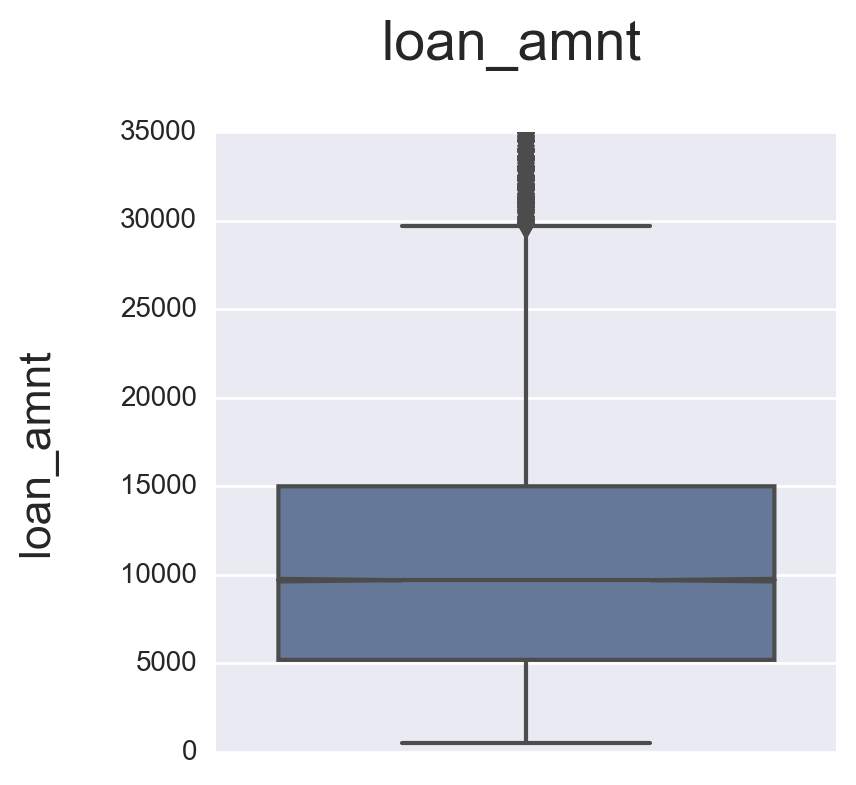

In [15]:
#Outliers (scatterplot)

fig = plt.figure(figsize=(4,4))
ax = fig.gca()

sns.boxplot(df2.loan_amnt    , orient='v',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('loan_amnt  \n', fontsize=16)
ax.set_title('loan_amnt  \n', fontsize=20)

plt.show()



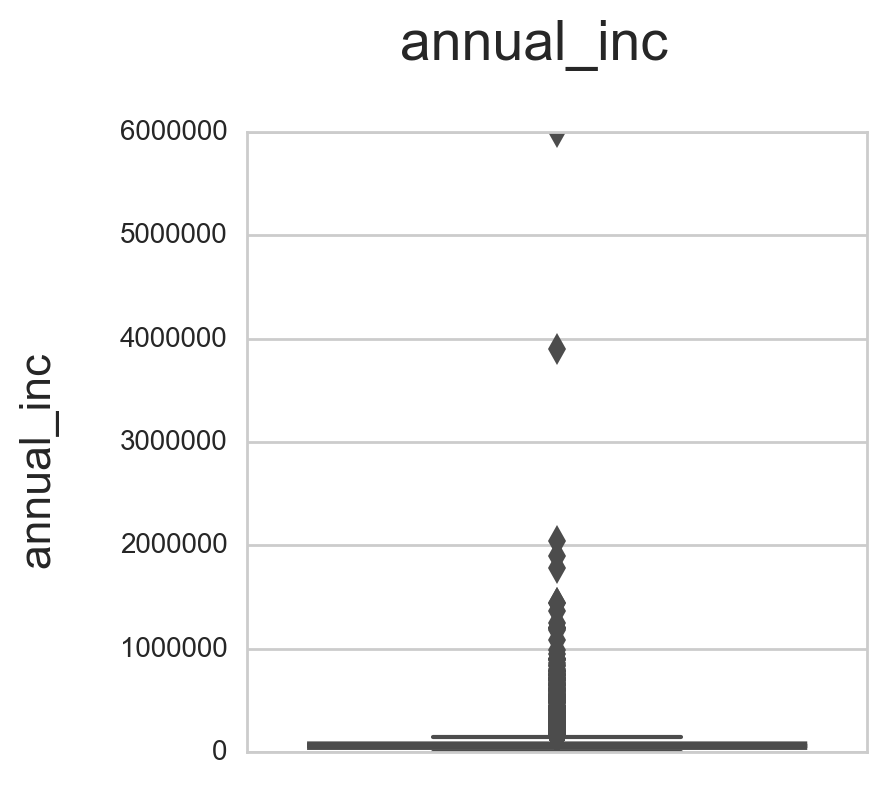

In [40]:
#Outliers (scatterplot)

fig = plt.figure(figsize=(4,4))
ax = fig.gca()

sns.boxplot(df2.annual_inc   , orient='v',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('annual_inc   \n', fontsize=16)
ax.set_title('annual_inc   \n', fontsize=20)

plt.show()

In [ ]:
#By visualizing this scatterplot, I notice that the annual income variable has a great number of outliers
#Those outliers are between a million dollar and 6 millions dollar, even though the maximum loan granted is only 35,000
#The variable actually represent the income stated on the application form, whether it is verified or not
#For our statistical analysis, we may need to focus on verified income or get rid of these outliers

#More information on the income verification process are available online:
#https://www.lendingclub.com/public/income-verification.action

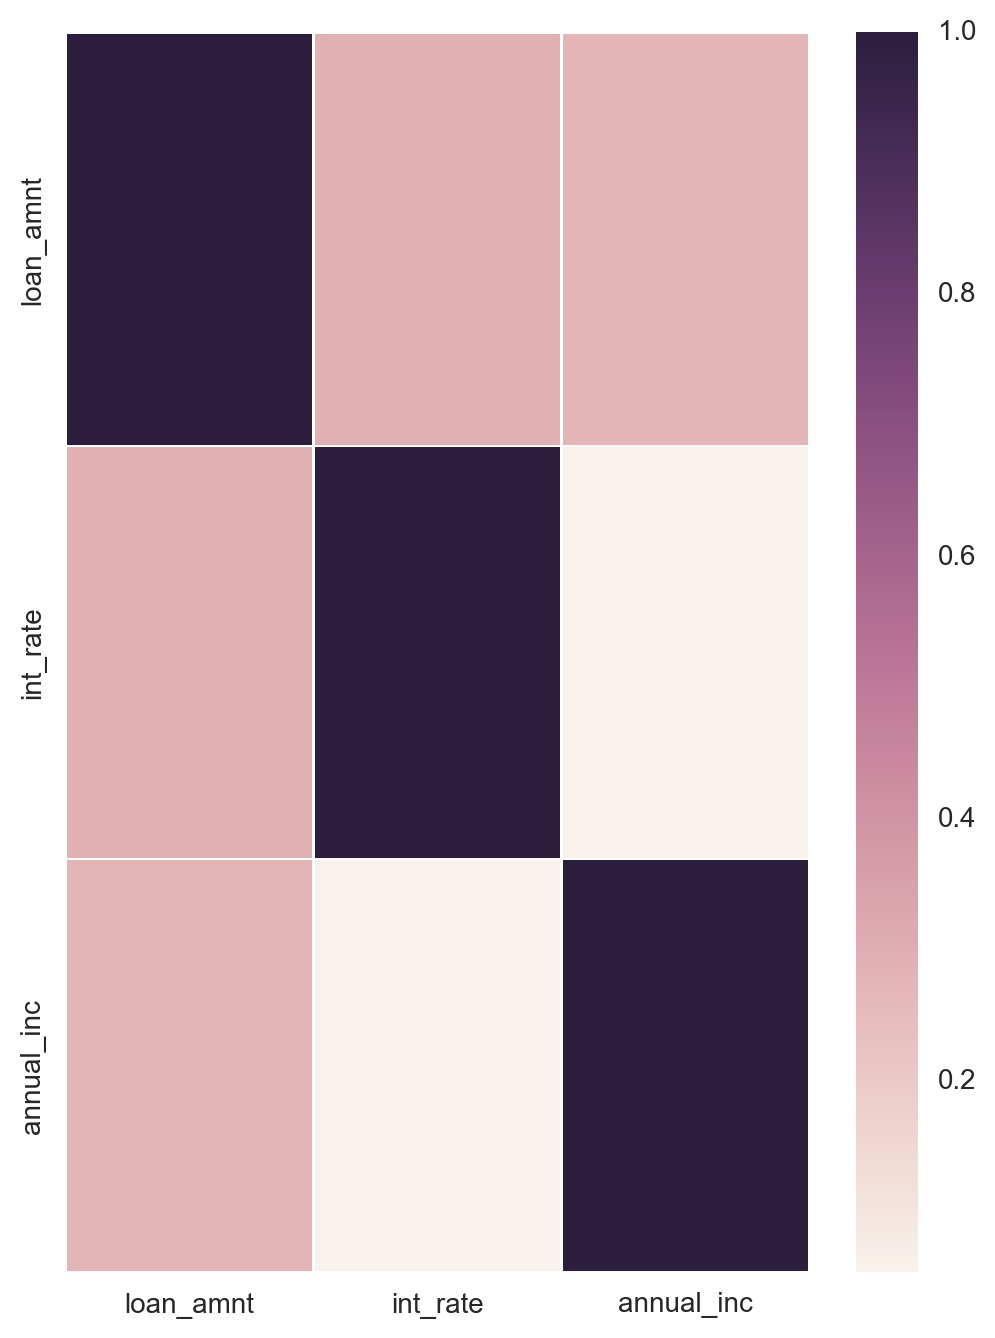

In [91]:
#Let's plot a correlation matrix and add lines between each cell
df_corr=df[['loan_amnt','term','int_rate','emp_length','annual_inc','emp_length']]
fig = plt.figure(figsize=(6,8))
ax = fig.gca()

sns.heatmap(df_corr.corr(), ax=ax, linewidths=.5)

plt.show()

#http://seaborn.pydata.org/generated/seaborn.heatmap.html

In [ ]:
#There is a positive correlation between the loan amount and the annual income
#The association between the loan amount and interest rate is also positive


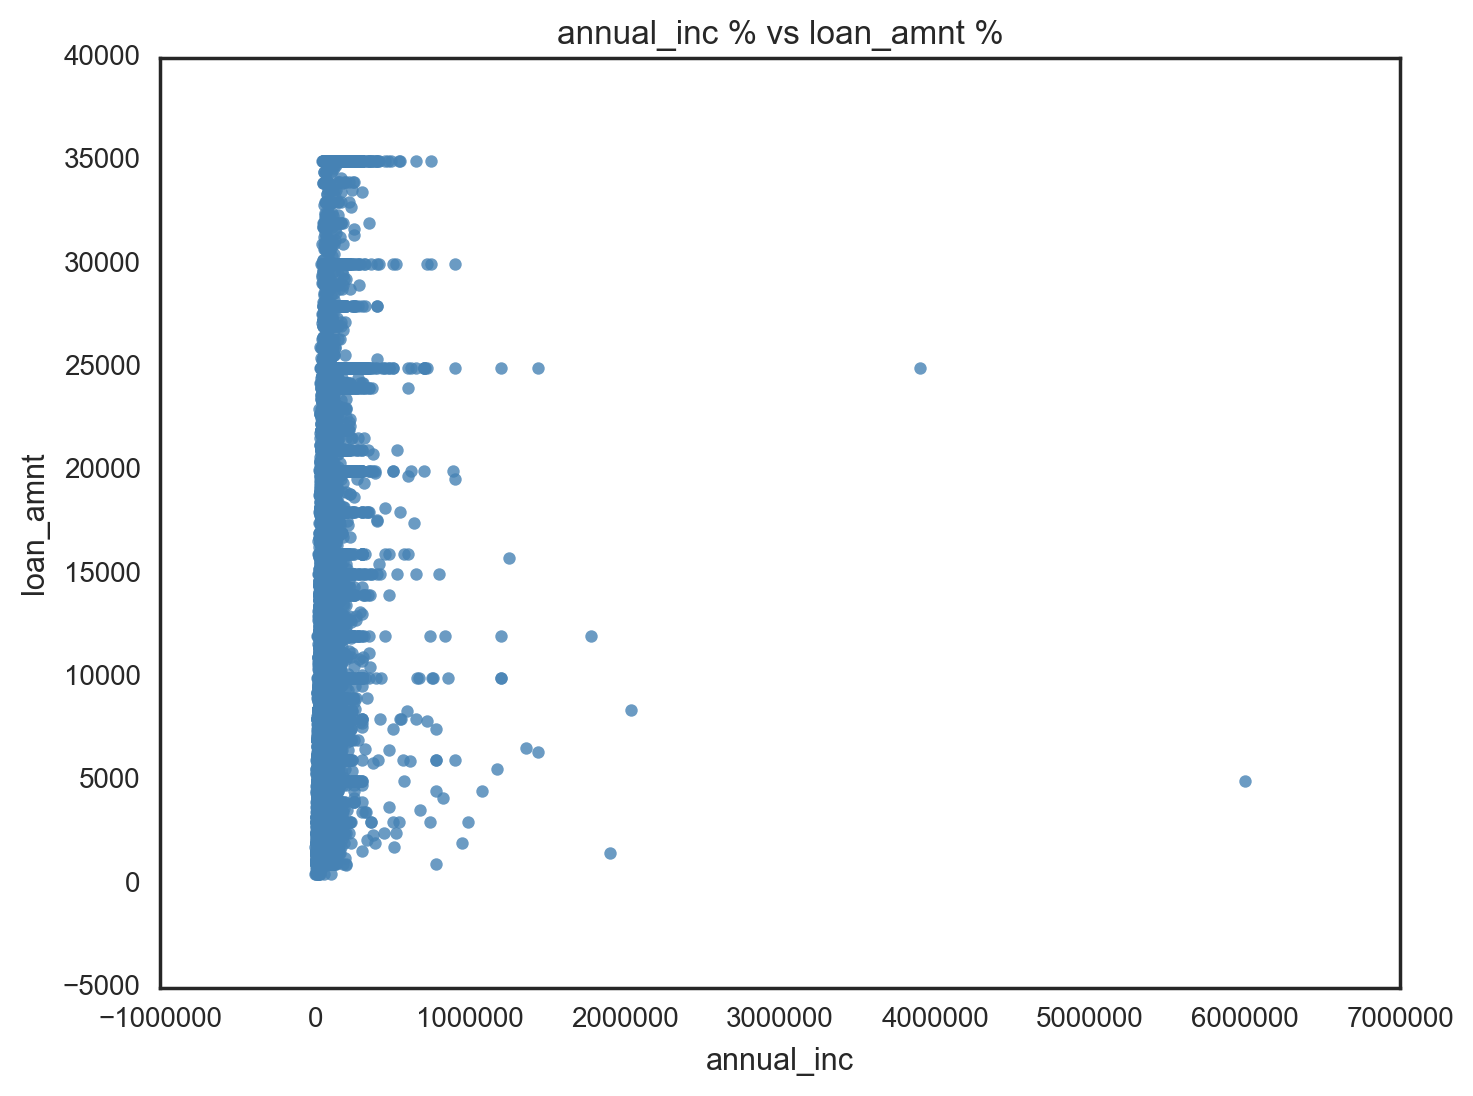

In [74]:
#Scatterplot of correlated variables

#Choose two variables that appear very related 
#Use seaborns regplot to plot a scatter plot between the pairs of variables

annual_inc = df2.annual_inc
loan_amnt = df2.loan_amnt

fig = plt.figure(figsize=(8,6))
ax = fig.gca()

ax = sns.regplot(annual_inc,loan_amnt, fit_reg=False, color='steelblue', ax=ax)

ax.set_title('annual_inc % vs loan_amnt %')
plt.show()

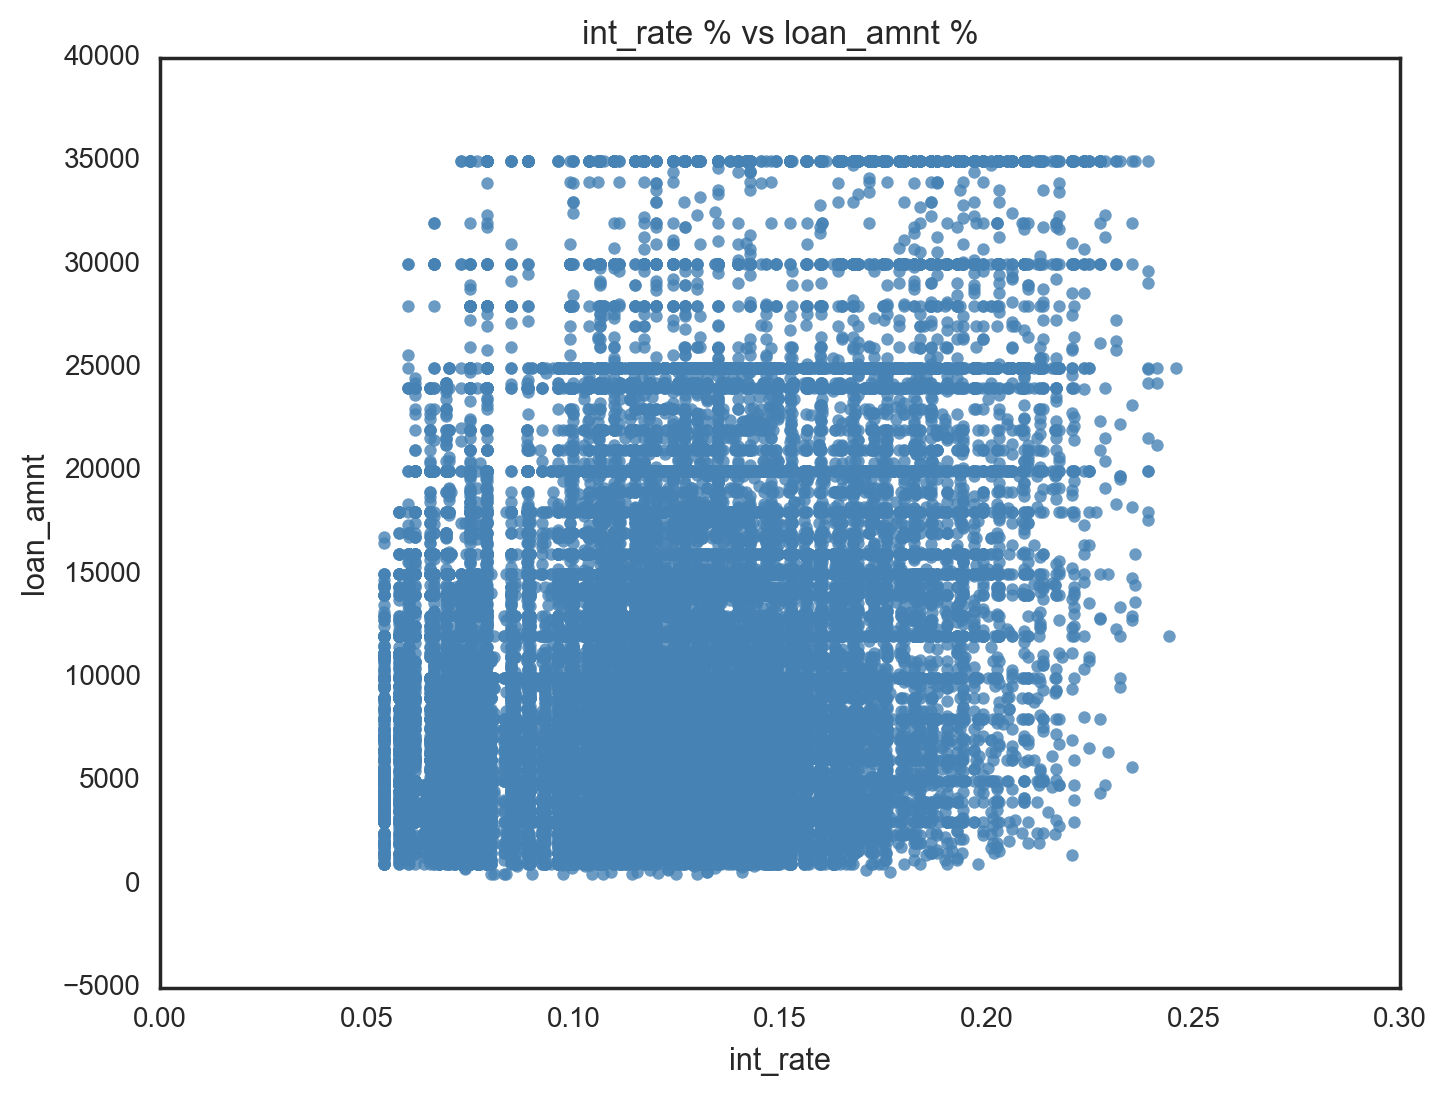

In [75]:
#Scatterplot of correlated variables

#Choose two variables that appear very related 
#Use seaborns regplot to plot a scatter plot between the pairs of variables

int_rate = df2.int_rate
loan_amnt = df2.loan_amnt

fig = plt.figure(figsize=(8,6))
ax = fig.gca()

ax = sns.regplot(int_rate,loan_amnt, fit_reg=False, color='steelblue', ax=ax)

ax.set_title('int_rate % vs loan_amnt %')
plt.show()

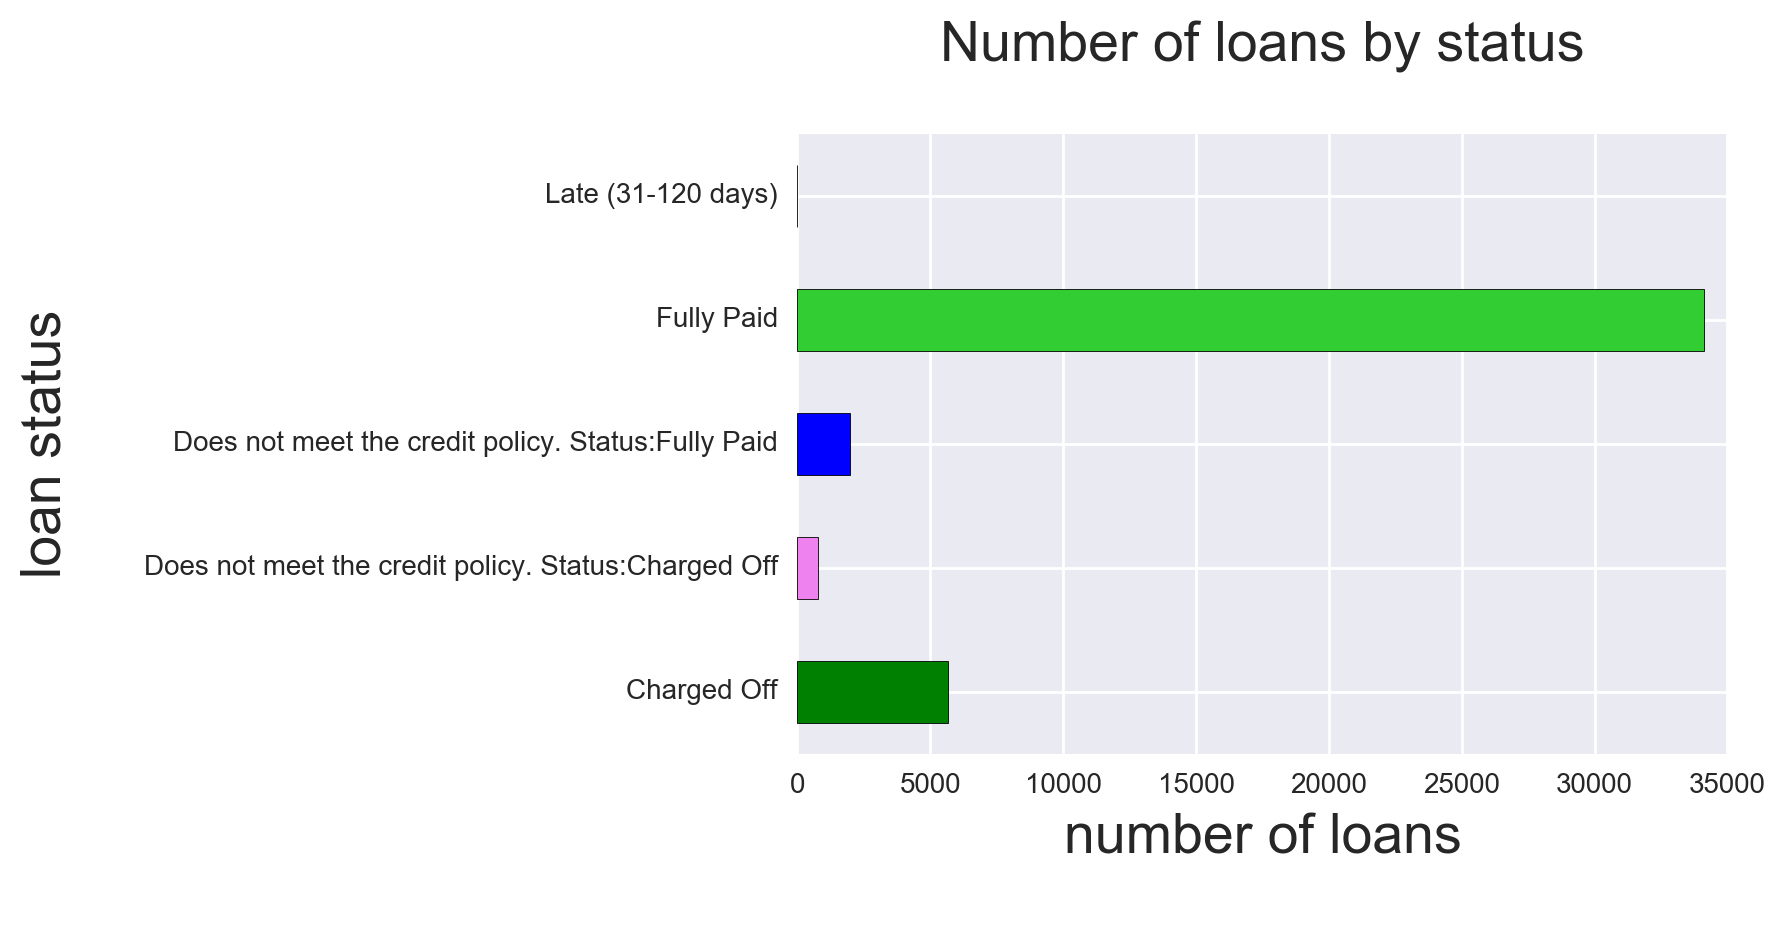

In [153]:
#Graph of loan by status
df2.groupby('loan_status')['id'].count().plot(kind='barh', color=['green', 'violet','blue','limegreen'])
plt.title('Number of loans by status\n', fontsize = 20)
plt.ylabel('loan status\n', fontsize=20)
plt.xlabel('number of loans\n', fontsize=20)
plt.show()


In [ ]:
#When we look at the number of loans and the loan status, it appears that the majority of loans are full paid and just
# a few NUMBER of loans payment are past due

In [137]:
#Then, let's list all the reasons people apply for a loan
df.purpose.unique()
#https://chrisalbon.com/python/pandas_list_unique_values_in_column.html

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational', ''], dtype=object)

In [36]:
#We can create broader categories of loan reasons and then plot a graph
def categories(c):
   
    if'credit_card' in c or 'debt_consolidation' in c:
        return 'finance'
    
    elif  'home_improvement' in c or 'house'in c or 'moving'  in c:
        return 'house'
    
    elif 'small_business'  in c:
        return 'small_business'
    
    elif 'wedding'  in c:
        return 'wedding'
    
    elif 'major_purchase' in c:
        return 'major_purchase'
    
    elif 'medical'  in c:
        return 'medical'
    
    elif 'vacation' in c:
        return 'vacation'
    
    elif 'educational' in c:
        return 'education'
    
    elif 'renewable_energy' in c:
        return 'renewable_energy'
    
    elif 'other' in c:
        return 'other'
    
df['broader_categories'] = df['purpose'].apply(categories) 

In [37]:
#Let's see the broader categories of loans that I have created
test= df[df['broader_categories'] == 'house']
test['purpose'].unique()

array(['home_improvement', 'moving', 'house'], dtype=object)

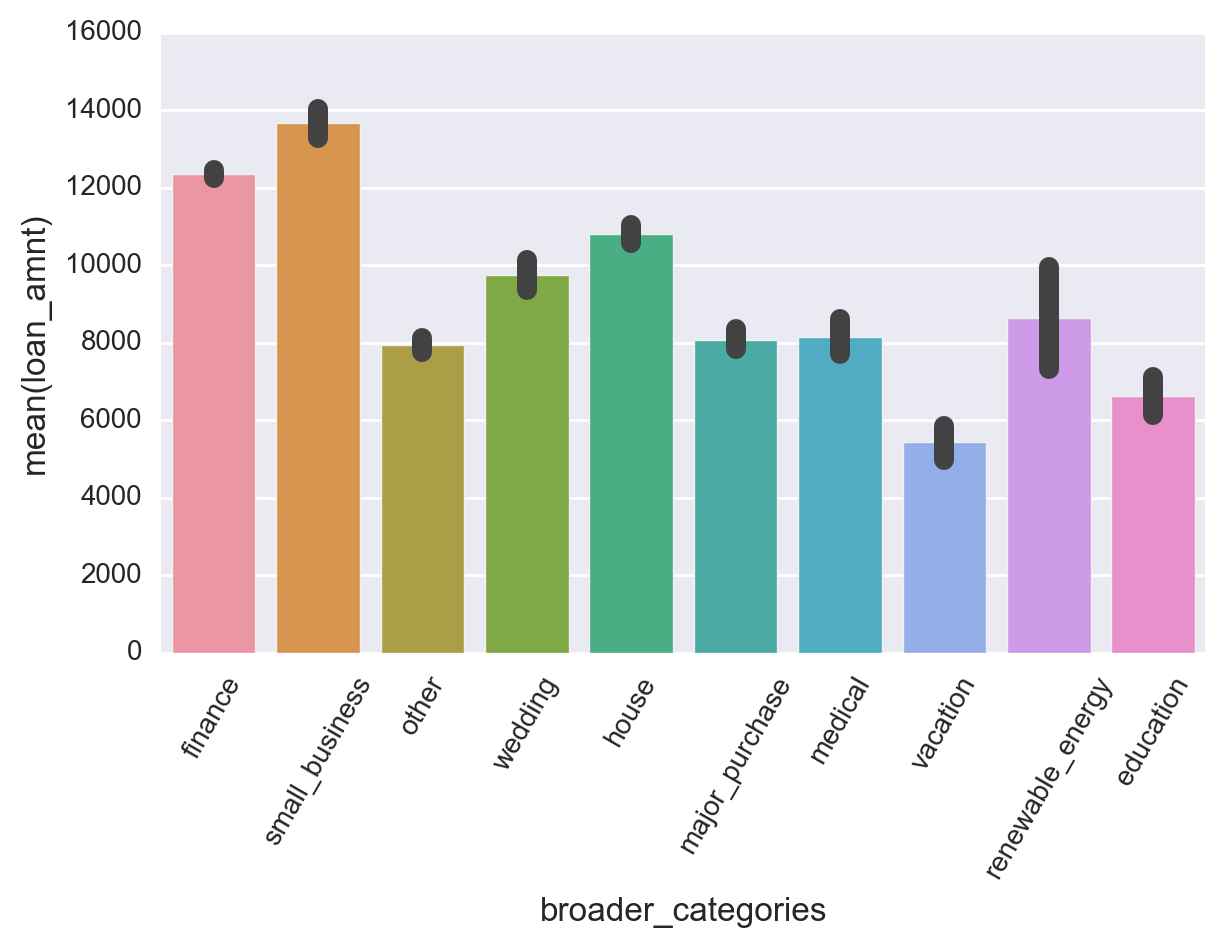

In [245]:
#Now, let's plot a graph
loan_by_purpose = df.groupby('broader_categories', as_index = False).agg({'loan_amnt': 'sum'})
x = df['broader_categories']
y = df['loan_amnt']
sns.barplot(x,y)
plt.xticks(rotation = 60)
plt.show()


In [ ]:
#On average, the total amount of loans granted is highest for small businesses, finance and home loans.

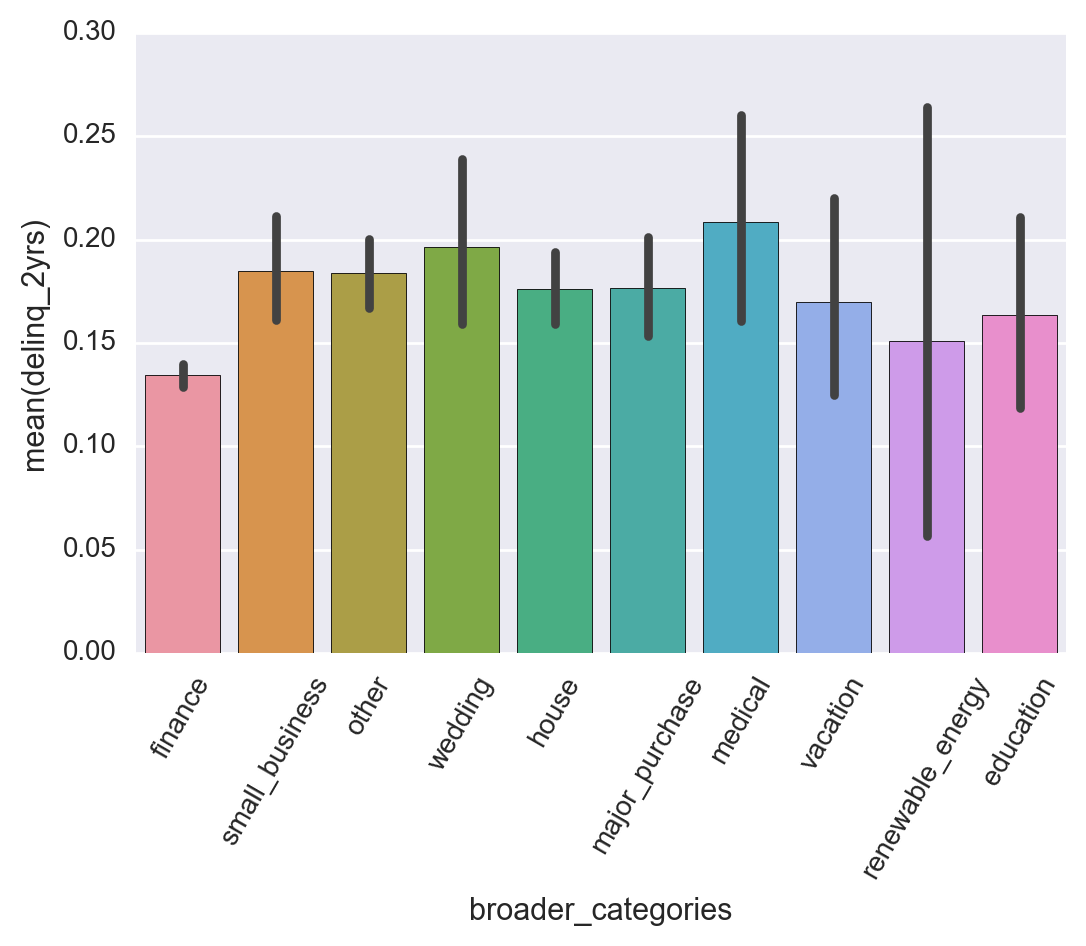

In [41]:
#What types of loans are delinquent?
delinq_status = df.groupby('broader_categories').agg({'delinq_2yrs':'count'})
x = df['broader_categories']
y = df['delinq_2yrs']
sns.barplot(x,y)
plt.xticks(rotation = 60)
plt.show()

In [ ]:
#Loans that have been delinquent for the past two years were requested for medical reasons, a wedding,  and by a small business.

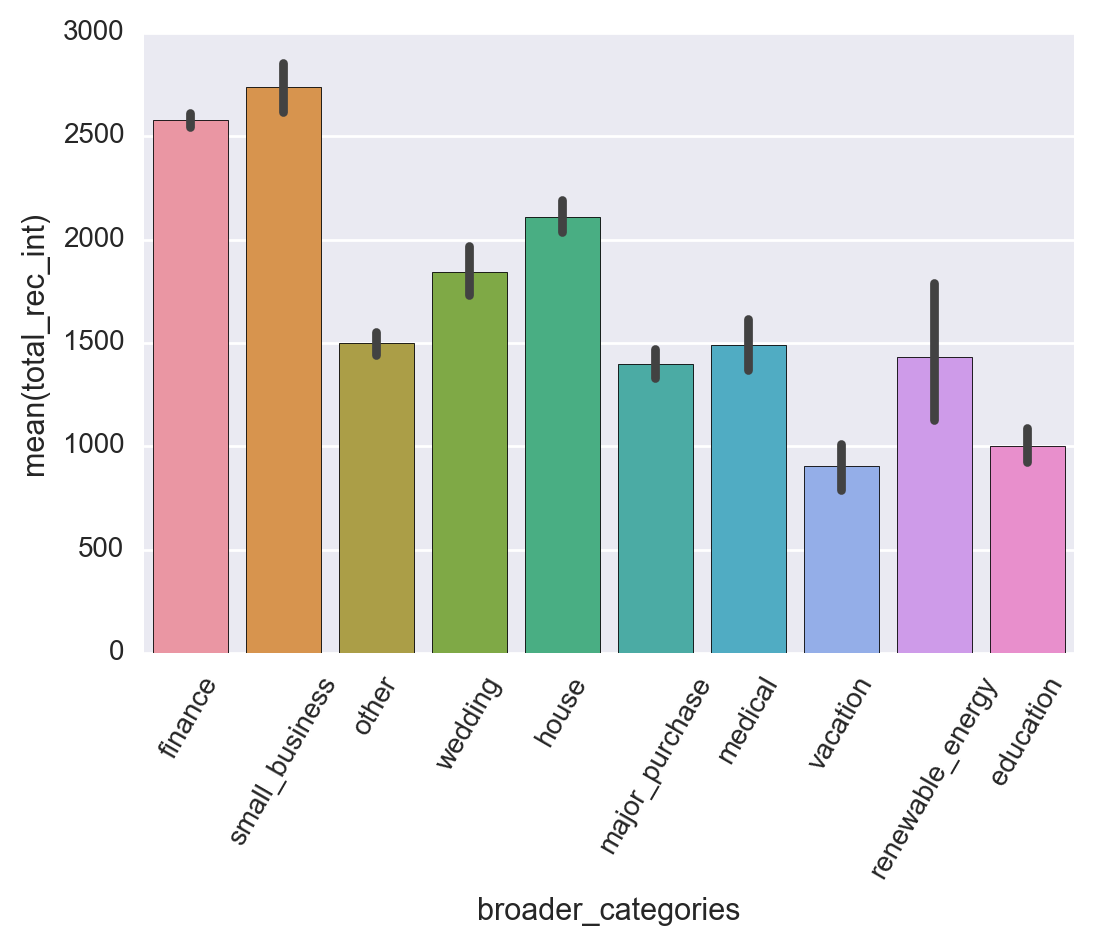

In [43]:
#What types of loans yielded more interest?
int_status = df.groupby('broader_categories').agg({'total_rec_int':'sum'})
x = df['broader_categories']
y = df['total_rec_int']
sns.barplot(x,y)
plt.xticks(rotation = 60)
plt.show()

In [ ]:
#The types of loans that yielded more interest are small business loans, finance loans, and home loans.

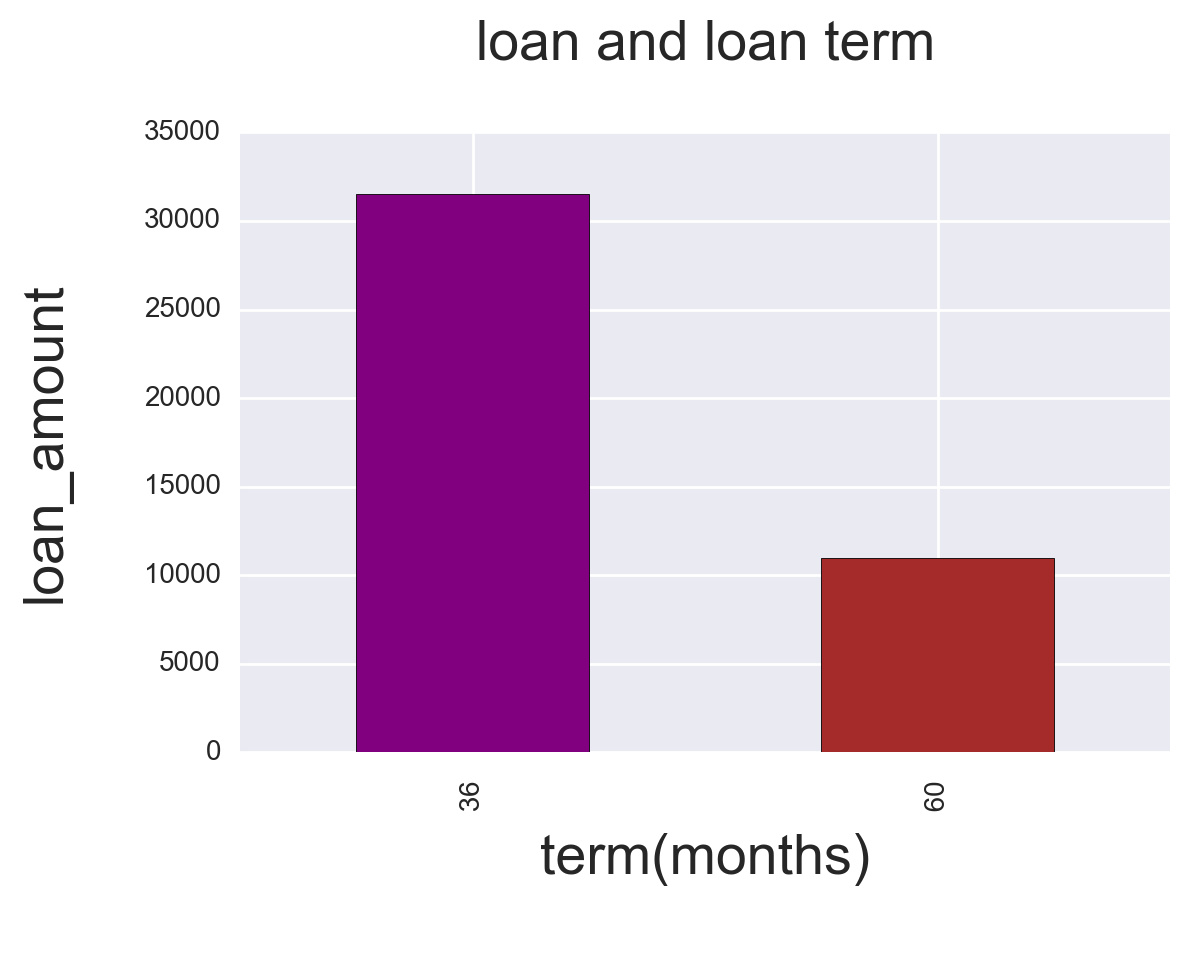

In [48]:
#Loan and Term
df2.groupby('term')['loan_amnt'].count().plot(kind="bar", color=['purple', 'brown'])
plt.title('loan and loan term\n', fontsize = 20)
plt.ylabel('loan_amount\n', fontsize=20)
plt.xlabel('term(months)\n', fontsize=20)
plt.show()


In [ ]:
#Lending Circle loans are mostly short-term loans 

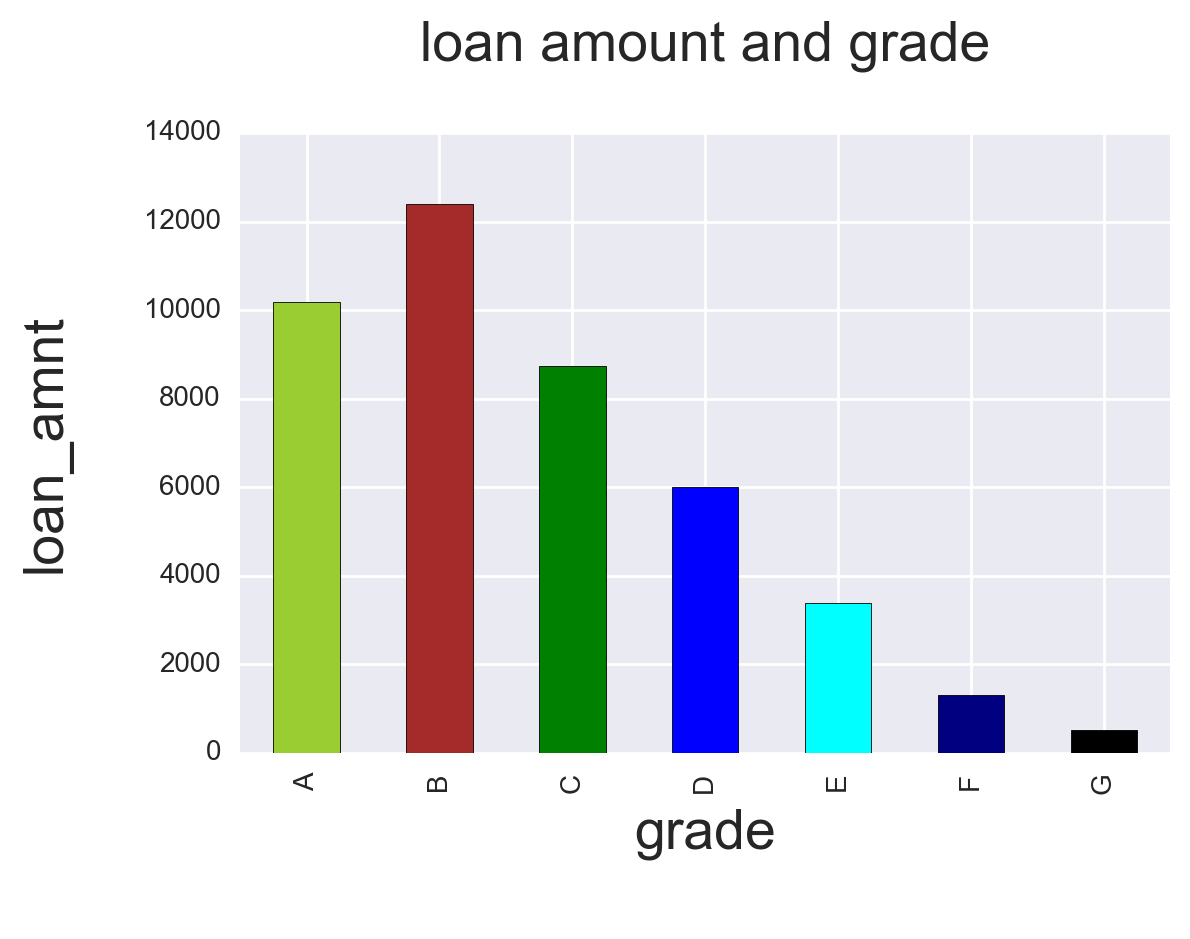

In [49]:
#Loan and Grade
df2.groupby('grade')['loan_amnt'].count().plot(kind="bar", colors=['yellowgreen', 'brown','green','blue','cyan','navy','black'])
plt.title('loan amount and grade\n', fontsize = 20)
plt.ylabel('loan_amnt\n', fontsize=20)
plt.xlabel('grade\n', fontsize=20)
plt.show()

In [ ]:
#A visualization of this chart suggests that the amount of loan is approved based on the credit score (grade)
#The higher your grade, the higher your loan

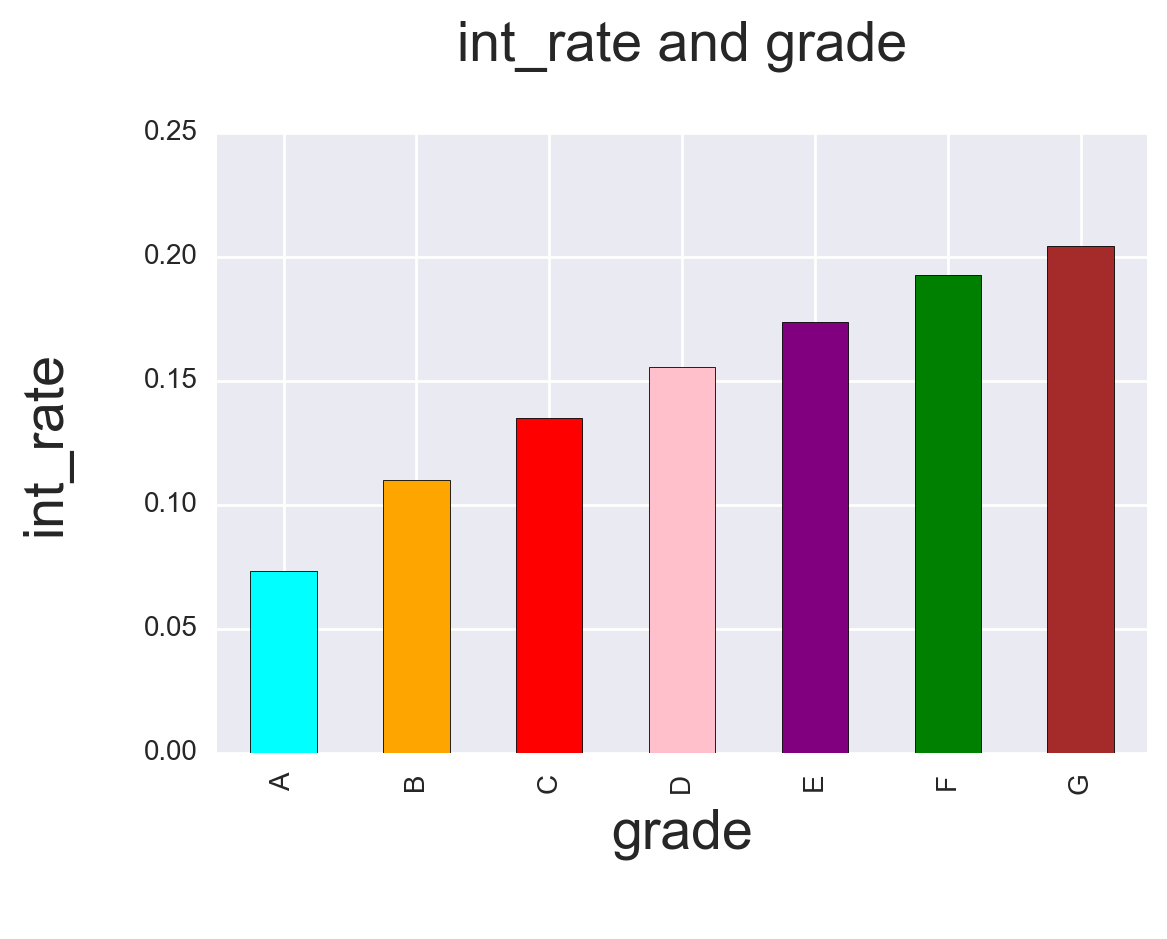

In [46]:
#Interest rate by grade

df2.groupby('grade')['int_rate'].mean().plot(kind="bar", colors=['cyan', 'orange','red','pink','purple','green','brown'])
plt.title('int_rate and grade\n', fontsize = 20)
plt.ylabel('int_rate\n', fontsize=20)
plt.xlabel('grade\n', fontsize=20)
plt.show()

In [ ]:
#Similarly, it appears that the interest rate is also based on the credit score
#The higher your grade, the lower your interest rate

# Main Findings

In [ ]:
# I am using  publicly available Lending Circle loan data 

#After cleaning the data and extracting the data essential to my analysis, I have performed an exploratory data analysis that has 
#revealed the following:

    # The income range is between $1896 and $6,000,000 and the scatterplot indicates outliers. 
      #Since the income stated on the application form is randomly verified, it may be the case
        ##that the income has been overstated in some cases. On the other hand, the possibility that
        ##a successful small business reports such income cannot be excluded. We will deal with those
        ##outliers in the next steps of our analysis. 
        
    #The great majority of loans are fully paid and a very small number of loans payment are past due
    
    #Small businesses, finance, and home loans represent the most common categories of loans issued and have yielded more interests
    
    #Loans that have been delinquent for the past two years were requested for medical reasons, a wedding, and for a small business

    #Lending Circle loans are mostly short-term loans (36 months)
    
    #The amount of loan approved is positively correlated with the credit score (grade):the higher your grade, the higher your loan 
    
    #The interest rate is negatively correlated with the credit score (grade):the higher your grade, the lower the interest rate